# generate feature list
```
python3 gen_feat.py --inf_list toy_imgs/img.list --feat_list toy_imgs/feat.list --resume magface_epoch_00025.pth
```

### imports and utility functions

In [73]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
import torch
sns.set(style="white") 
%matplotlib inline

print(torch.cuda.is_available())

True


### Dictionaries with features and magnitudes

In [80]:
with open('toy_imgs/feat.list', 'r') as f:
    lines = f.readlines()

img_2_feats = {} #dictionary of features
img_2_mag = {} #dictionary of magnitudes
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0] #image name
    feats = [float(e) for e in parts[1:]] #list with features
    mag = np.linalg.norm(feats) #euclidean norm of the features (one per image)
    img_2_feats[imgname] = feats/mag #normalization
    img_2_mag[imgname] = mag #dictionary with key = image name, value = magnitude of the features


imgnames = list(img_2_mag.keys()) #list of image names extracted from the dictionary
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)

print(imgnames)

print("_________________________________________________________________________")
print(f"length of dictionary with key = image name, value=[features] {len(img_2_feats)}")
print(f"length of dictionary with key = image name, value=magnitude of the features {len(img_2_mag)}")

['toy_imgs/original_id3785_1.jpg', 'toy_imgs/original_id667_1.jpg', 'toy_imgs/original_id3422_1.jpg', 'toy_imgs/original_id268_1.jpg', 'toy_imgs/original_id6817_1.jpg', 'toy_imgs/original_id4627_1.jpg', 'toy_imgs/original_id9289_1.jpg', 'toy_imgs/original_id266_1.jpg', 'toy_imgs/original_id6622_1.jpg', 'toy_imgs/original_id8289_1.jpg', 'toy_imgs/original_id4929_1.jpg', 'toy_imgs/original_id8593_1.jpg', 'toy_imgs/original_id7147_1.jpg', 'toy_imgs/original_id8766_1.jpg', 'toy_imgs/original_id9490_1.jpg', 'toy_imgs/original_id2680_1.jpg', 'toy_imgs/original_id8298_1.jpg', 'toy_imgs/original_id6819_1.jpg', 'toy_imgs/original_id7410_1.jpg', 'toy_imgs/original_id8587_1.jpg', 'toy_imgs/original_id1735_1.jpg', 'toy_imgs/original_id3422_2.jpg', 'toy_imgs/original_id1643_1.jpg', 'toy_imgs/original_id2292_1.jpg', 'toy_imgs/original_id3032_1.jpg', 'toy_imgs/original_id1107_1.jpg', 'toy_imgs/original_id8582_1.jpg', 'toy_imgs/original_id3860_1.jpg', 'toy_imgs/original_id2049_1.jpg', 'toy_imgs/origin

### Correlations mated original and save correlations in txt

In [81]:
# function to compute correlation between two images based on features
def compute_feature_correlation(feats1, feats2):
    return np.dot(feats1, feats2) / (np.linalg.norm(feats1) * np.linalg.norm(feats2)) # dot product / (norm1 * norm2) -> cosine similarity


#compute average correlation between all the images
def calculate_average_correlation(images):
    correlations = []
    
    for i in range(len(images)):
        for j in range(i + 1, len(images)):
            correlation = compute_feature_correlation(img_2_feats[images[i]], img_2_feats[images[j]])
            correlations.append(correlation)
    
    return np.mean(correlations), correlations


#filter only images with 'original' in their names
original_images = [imgname for imgname in list(img_2_mag.keys()) if "original" in imgname]
print(original_images)

#group original images by celebrity
celebrity_groups = {}
for imgname in original_images:
    start_index = imgname.find("id") + 2  # Move 2 characters after "id"
    end_index = imgname.rfind("_")  # Find the last occurrence of "_"
    celebrity_id = imgname[start_index:end_index]
    
    if celebrity_id not in celebrity_groups:
        celebrity_groups[celebrity_id] = []
    celebrity_groups[celebrity_id].append(imgname)

# Compute the average correlation between all the original images of each celebrity
output_file_path = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_original.txt'
correlations_all = []

with open(output_file_path, 'w') as f:
    for celebrity_id, images in celebrity_groups.items():
        _, correlations = calculate_average_correlation(images)
        for correlation in correlations:
            f.write(f"{correlation:.18e}\n")
        correlations_all.extend(correlations)
    print("correlations saved in file ", output_file_path)

# Calcola le statistiche sulle correlazioni
avg_corr = np.mean(correlations_all)
min_corr = np.min(correlations_all)
max_corr = np.max(correlations_all)
std_dev_corr = np.std(correlations_all)
skewness_corr = np.mean((correlations_all - np.mean(correlations_all))**3) / (np.std(correlations_all)**3)

print("_________________________________________________________________________")
print(f"number of correlations: {len(correlations_all)}")
print(f"Average correlation: {avg_corr}")
print(f"Minimum correlation: {min_corr}")
print(f"Maximum correlation: {max_corr}")
print(f"Standard deviation of correlations: {std_dev_corr}")
print(f"Skewness of correlations: {skewness_corr}")


['toy_imgs/original_id3785_1.jpg', 'toy_imgs/original_id667_1.jpg', 'toy_imgs/original_id3422_1.jpg', 'toy_imgs/original_id268_1.jpg', 'toy_imgs/original_id6817_1.jpg', 'toy_imgs/original_id4627_1.jpg', 'toy_imgs/original_id9289_1.jpg', 'toy_imgs/original_id266_1.jpg', 'toy_imgs/original_id6622_1.jpg', 'toy_imgs/original_id8289_1.jpg', 'toy_imgs/original_id4929_1.jpg', 'toy_imgs/original_id8593_1.jpg', 'toy_imgs/original_id7147_1.jpg', 'toy_imgs/original_id8766_1.jpg', 'toy_imgs/original_id9490_1.jpg', 'toy_imgs/original_id2680_1.jpg', 'toy_imgs/original_id8298_1.jpg', 'toy_imgs/original_id6819_1.jpg', 'toy_imgs/original_id7410_1.jpg', 'toy_imgs/original_id8587_1.jpg', 'toy_imgs/original_id1735_1.jpg', 'toy_imgs/original_id3422_2.jpg', 'toy_imgs/original_id1643_1.jpg', 'toy_imgs/original_id2292_1.jpg', 'toy_imgs/original_id3032_1.jpg', 'toy_imgs/original_id1107_1.jpg', 'toy_imgs/original_id8582_1.jpg', 'toy_imgs/original_id3860_1.jpg', 'toy_imgs/original_id2049_1.jpg', 'toy_imgs/origin

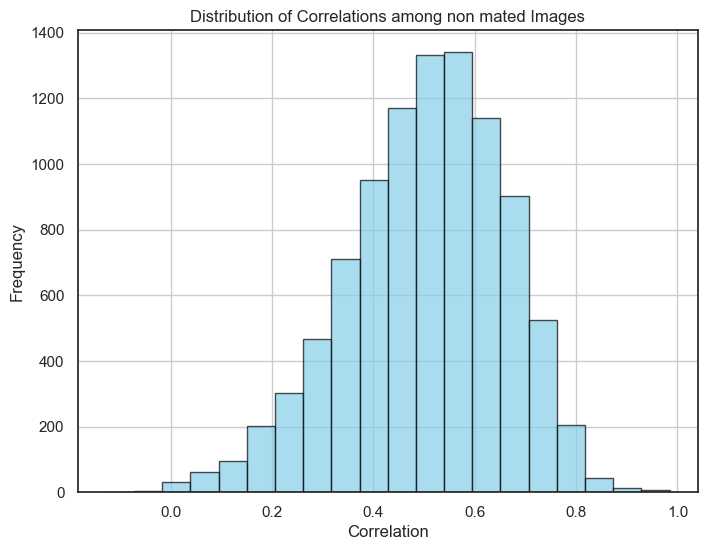

In [23]:
import matplotlib.pyplot as plt


# Plot the histogram of correlations
plt.figure(figsize=(8, 6))
plt.hist(correlations_all, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Correlations among non mated Images')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




### Correlations mated gaussian blur levels and save correlations in txt

In [82]:
# function to compute correlation between two images based on features
def compute_feature_correlation(feats1, feats2):
    return np.dot(feats1, feats2) / (np.linalg.norm(feats1) * np.linalg.norm(feats2)) # dot product / (norm1 * norm2) -> cosine similarity

#function that calculates the correlation between an image and a list of images
def calculate_correlations(image_A, image_list):
    correlations = []

    for image in image_list:
        correlation = compute_feature_correlation(img_2_feats[image_A], img_2_feats[image])
        correlations.append(correlation)

    return correlations


#group all images by celebrity
celebrity_groups = {}
for imgname in list(img_2_mag.keys()):
    start_index = imgname.find("id") + 2  # Move 2 characters after "id"
    end_index = imgname.rfind("_")  # Find the last occurrence of "_"
    celebrity_id = imgname[start_index:end_index]
    
    if celebrity_id not in celebrity_groups:
        celebrity_groups[celebrity_id] = []
    celebrity_groups[celebrity_id].append(imgname)


avg_corrs = []
# iterate over all blur levels
for blur_level in range(1, 10):  #blur levels are named blur1, blur2, ..., blur5
    output_file_path = f'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_blur{blur_level}.txt'
    correlations_all = []

    with open(output_file_path, 'w') as f:
        for celebrity_id, celeb_images in celebrity_groups.items():
            # print(f"Processing celebrity {celebrity_id} for blur level {blur_level}")
            # print(celebrity_id + ":" + str(celeb_images))
            images_blurred = [imgname for imgname in celeb_images if f"blur{blur_level}_" in imgname]
            original_images_oneceleb = [imgname for imgname in celeb_images if "original" in imgname]
           
            if not images_blurred:
                continue

            for one_blurred in images_blurred:
                correlations = calculate_correlations(one_blurred, original_images_oneceleb)
                # print(f"correlation between {one_blurred} and original images: {original_images_oneceleb}")
                for correlation in correlations:
                    f.write(f"{correlation:.18e}\n")
                correlations_all.extend(correlations)
                
        print(len(correlations_all))
        print(f"Correlations saved in file: {output_file_path}")

    # Calculate statistics on correlations for the current blur level
    avg_corr = np.mean(correlations_all)
    avg_corrs.append(avg_corr)
    min_corr = np.min(correlations_all)
    max_corr = np.max(correlations_all)
    std_dev_corr = np.std(correlations_all)
    skewness_corr = np.mean((correlations_all - np.mean(correlations_all))**3) / (np.std(correlations_all)**3)

    print("_________________________________________________________________________")
    print(f"Number of correlations: {len(correlations_all)}")
    print(f"Average correlation (Blur {blur_level}): {avg_corr}")
    print(f"Minimum correlation (Blur {blur_level}): {min_corr}")
    print(f"Maximum correlation (Blur {blur_level}): {max_corr}")
    print(f"Standard deviation of correlations (Blur {blur_level}): {std_dev_corr}")
    print(f"Skewness of correlations (Blur {blur_level}): {skewness_corr}")


20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_blur1.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (Blur 1): 0.3429525303339905
Minimum correlation (Blur 1): -0.1689449196629537
Maximum correlation (Blur 1): 0.8317941210613427
Standard deviation of correlations (Blur 1): 0.14561279559466175
Skewness of correlations (Blur 1): 0.05016924090764503
20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_blur2.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (Blur 2): 0.2804303257135524
Minimum correlation (Blur 2): -0.13527386351845194
Maximum correlation (Blur 2): 0.7694794521907585
Standard deviation of correlations (Blur 

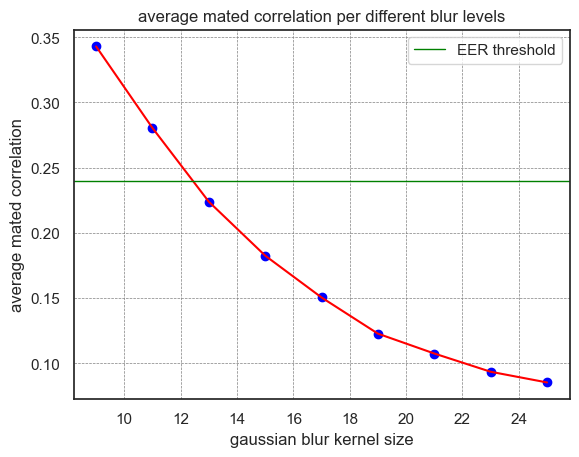

In [83]:
import matplotlib.pyplot as plt

x = [9, 11, 13, 15, 17, 19, 21, 23, 25]
y = avg_corrs

# Creare il grafico a dispersione
plt.scatter(x, y, color='blue', marker='o')

# Tracciare la linea che interpola i punti
plt.plot(x, y, color='red')

# Etichettare gli assi
plt.xlabel('gaussian blur kernel size')
plt.ylabel('average mated correlation')

# Titolo del grafico
plt.title('average mated correlation per different blur levels')


# Mostrare la griglia con personalizzazione
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')

# Aggiungere la riga y=0.3
plt.axhline(y=0.23982732133720322, color='green', linestyle='-', linewidth=1, label='EER threshold')
# Mostrare la leggenda
plt.legend()

# Mostrare il grafico
plt.show()

### Correlations mated median blur levels and save correlations in txt

In [35]:
#group all images by celebrity
celebrity_groups = {}
for imgname in list(img_2_mag.keys()):
    start_index = imgname.find("id") + 2  # Move 2 characters after "id"
    end_index = imgname.rfind("_")  # Find the last occurrence of "_"
    celebrity_id = imgname[start_index:end_index]
    
    if celebrity_id not in celebrity_groups:
        celebrity_groups[celebrity_id] = []
    celebrity_groups[celebrity_id].append(imgname)


avg_corrs = []
# iterate over all blur levels
for medianblur_level in range(1, 10):  #blur levels are named blur1, blur2, ..., blur5
    output_file_path = f'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_medianblur{medianblur_level}.txt'
    correlations_all = []

    with open(output_file_path, 'w') as f:
        for celebrity_id, celeb_images in celebrity_groups.items():
            # print(f"Processing celebrity {celebrity_id} for blur level {medianblur_level}")
            # print(celebrity_id + ":" + str(celeb_images))
            images_medianblurred = [imgname for imgname in celeb_images if f"median_blur{medianblur_level}_" in imgname]
            original_images_oneceleb = [imgname for imgname in celeb_images if "original" in imgname]
           
            if not images_medianblurred:
                continue

            for one_blurred in images_medianblurred:
                correlations = calculate_correlations(one_blurred, original_images_oneceleb)
                # print(f"correlation between {one_blurred} and original images: {original_images_oneceleb}")
                for correlation in correlations:
                    f.write(f"{correlation:.18e}\n")
                correlations_all.extend(correlations)
                
        print(len(correlations_all))
        print(f"Correlations saved in file: {output_file_path}")

    # Calculate statistics on correlations for the current blur level
    avg_corr = np.mean(correlations_all)
    avg_corrs.append(avg_corr)
    min_corr = np.min(correlations_all)
    max_corr = np.max(correlations_all)
    std_dev_corr = np.std(correlations_all)
    skewness_corr = np.mean((correlations_all - np.mean(correlations_all))**3) / (np.std(correlations_all)**3)

    print("_________________________________________________________________________")
    print(f"Number of correlations: {len(correlations_all)}")
    print(f"Average correlation (Median Blur {medianblur_level}): {avg_corr}")
    print(f"Minimum correlation (Median Blur {medianblur_level}): {min_corr}")
    print(f"Maximum correlation (Median Blur {medianblur_level}): {max_corr}")
    print(f"Standard deviation of correlations (Median Blur {medianblur_level}): {std_dev_corr}")
    print(f"Skewness of correlations (Median Blur {medianblur_level}): {skewness_corr}")


20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_medianblur1.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (Median Blur 1): 0.37482216070185287
Minimum correlation (Median Blur 1): -0.1466483820396433
Maximum correlation (Median Blur 1): 0.9187662705843204
Standard deviation of correlations (Median Blur 1): 0.14277939612367216
Skewness of correlations (Median Blur 1): 0.07819084567579897
20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_medianblur2.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (Median Blur 2): 0.26808056542925757
Minimum correlation (Median Blur 2): -0.1507420349014372
Maximum correlation (Median 

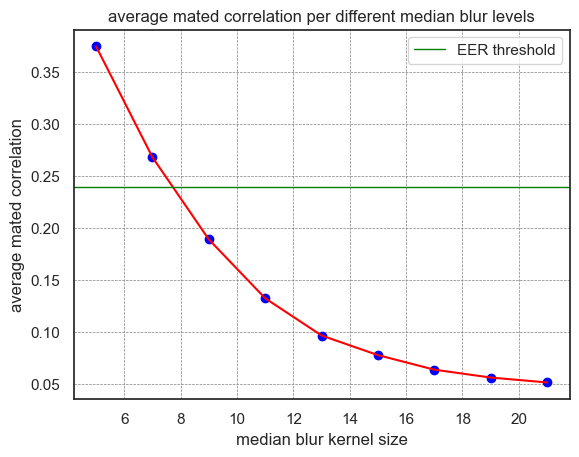

In [40]:
import matplotlib.pyplot as plt

x = [5, 7, 9, 11, 13, 15, 17, 19, 21]
y = avg_corrs

# Creare il grafico a dispersione
plt.scatter(x, y, color='blue', marker='o')

# Tracciare la linea che interpola i punti
plt.plot(x, y, color='red')

# Etichettare gli assi
plt.xlabel('median blur kernel size')
plt.ylabel('average mated correlation')

# Titolo del grafico
plt.title('average mated correlation per different median blur levels')


# Mostrare la griglia con personalizzazione
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')

# Aggiungere la riga y=0.3
plt.axhline(y=0.23982732133720322, color='green', linestyle='-', linewidth=1, label='EER threshold')
# Mostrare la leggenda
plt.legend()

# Mostrare il grafico
plt.show()

### Correlations mated pixelization levels and save correlations in txt

In [47]:
# function to compute correlation between two images based on features
def compute_feature_correlation(feats1, feats2):
    return np.dot(feats1, feats2) / (np.linalg.norm(feats1) * np.linalg.norm(feats2)) # dot product / (norm1 * norm2) -> cosine similarity

#function that calculates the correlation between an image and a list of images
def calculate_correlations(image_A, image_list):
    correlations = []

    for image in image_list:
        correlation = compute_feature_correlation(img_2_feats[image_A], img_2_feats[image])
        correlations.append(correlation)

    return correlations


#group all images by celebrity
celebrity_groups = {}
for imgname in list(img_2_mag.keys()):
    start_index = imgname.find("id") + 2  # Move 2 characters after "id"
    end_index = imgname.rfind("_")  # Find the last occurrence of "_"
    celebrity_id = imgname[start_index:end_index]
    
    if celebrity_id not in celebrity_groups:
        celebrity_groups[celebrity_id] = []
    celebrity_groups[celebrity_id].append(imgname)


avg_corrs = []
# iterate over all pixelization levels
for pixelization_level in range(1, 10):  #pixelization levels are named pixelization1, pixelization2, ..., pixelization10
    output_file_path = f'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_pixelization{pixelization_level}.txt'
    correlations_all = []

    with open(output_file_path, 'w') as f:
        for celebrity_id, celeb_images in celebrity_groups.items():
            # print(f"Processing celebrity {celebrity_id} for pixelization level {pixelization_level}")
            # print(celebrity_id + ":" + str(celeb_images))
            images_pixelized = [imgname for imgname in celeb_images if f"pixelization{pixelization_level}_" in imgname]
            original_images_oneceleb = [imgname for imgname in celeb_images if "original" in imgname]
           
            if not images_pixelized:
                continue

            for one_pixelized in images_pixelized:
                correlations = calculate_correlations(one_pixelized, original_images_oneceleb)
                # print(f"correlation between {one_pixelized} and original images: {original_images_oneceleb}")
                for correlation in correlations:
                    f.write(f"{correlation:.18e}\n")
                correlations_all.extend(correlations)
                
        print(len(correlations_all))
        print(f"Correlations saved in file: {output_file_path}")

    # Calculate statistics on correlations for the current blur level
    avg_corr = np.mean(correlations_all)
    avg_corrs.append(avg_corr)
    min_corr = np.min(correlations_all)
    max_corr = np.max(correlations_all)
    std_dev_corr = np.std(correlations_all)
    skewness_corr = np.mean((correlations_all - np.mean(correlations_all))**3) / (np.std(correlations_all)**3)

    print("_________________________________________________________________________")
    print(f"Number of correlations: {len(correlations_all)}")
    print(f"Average correlation (Blur {pixelization_level}): {avg_corr}")
    print(f"Minimum correlation (Blur {pixelization_level}): {min_corr}")
    print(f"Maximum correlation (Blur {pixelization_level}): {max_corr}")
    print(f"Standard deviation of correlations (Blur {pixelization_level}): {std_dev_corr}")
    print(f"Skewness of correlations (Blur {pixelization_level}): {skewness_corr}")


20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_pixelization1.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (Blur 1): 0.4742296520593235
Minimum correlation (Blur 1): -0.06595117389638372
Maximum correlation (Blur 1): 0.9448684655021381
Standard deviation of correlations (Blur 1): 0.1611456150047502
Skewness of correlations (Blur 1): 0.05514460291384363
20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_pixelization2.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (Blur 2): 0.4315332725319975
Minimum correlation (Blur 2): -0.11921718136388829
Maximum correlation (Blur 2): 0.8918039374481556
Standard deviation of cor

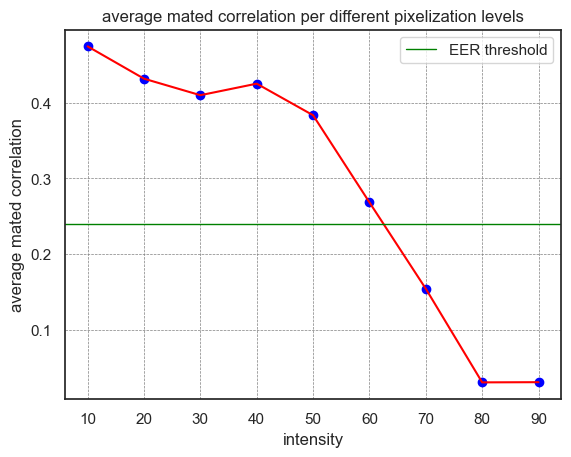

In [50]:
import matplotlib.pyplot as plt

x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
y = avg_corrs

# Creare il grafico a dispersione
plt.scatter(x, y, color='blue', marker='o')

# Tracciare la linea che interpola i punti
plt.plot(x, y, color='red')

# Etichettare gli assi
plt.xlabel('intensity')
plt.ylabel('average mated correlation')

# Titolo del grafico
plt.title('average mated correlation per different pixelization levels')


# Mostrare la griglia con personalizzazione
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')

# Aggiungere la riga y=0.3
plt.axhline(y=0.23982732133720322, color='green', linestyle='-', linewidth=1, label='EER threshold')
# Mostrare la leggenda
plt.legend()

# Mostrare il grafico
plt.show()

### Correlations mated black mask levels and save correlations in txt

In [60]:
#group all images by celebrity
celebrity_groups = {}
for imgname in list(img_2_mag.keys()):
    start_index = imgname.find("id") + 2  # Move 2 characters after "id"
    end_index = imgname.rfind("_")  # Find the last occurrence of "_"
    celebrity_id = imgname[start_index:end_index]
    
    if celebrity_id not in celebrity_groups:
        celebrity_groups[celebrity_id] = []
    celebrity_groups[celebrity_id].append(imgname)


avg_corrs = []
# iterate over all masking levels
for mask_opacity in range(1, 10):  
    output_file_path = f'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_masked{mask_opacity}.txt'
    correlations_all = []

    with open(output_file_path, 'w') as f:
        for celebrity_id, celeb_images in celebrity_groups.items():
            # print(f"Processing celebrity {celebrity_id} for pixelization level {mask_opacity}")
            # print(celebrity_id + ":" + str(celeb_images))
            images_masked = [imgname for imgname in celeb_images if f"mask_opacity{mask_opacity}_" in imgname]
            original_images_oneceleb = [imgname for imgname in celeb_images if "original" in imgname]
           
            if not images_masked:
                continue

            for one_masked in images_masked:
                correlations = calculate_correlations(one_masked, original_images_oneceleb)
                # print(f"correlation between {one_masked} and original images: {original_images_oneceleb}")
                for correlation in correlations:
                    f.write(f"{correlation:.18e}\n")
                correlations_all.extend(correlations)
                
        print(len(correlations_all))
        print(f"Correlations saved in file: {output_file_path}")

    # Calculate statistics on correlations for the current mask opacity level
    avg_corr = np.mean(correlations_all)
    avg_corrs.append(avg_corr)
    min_corr = np.min(correlations_all)
    max_corr = np.max(correlations_all)
    std_dev_corr = np.std(correlations_all)
    skewness_corr = np.mean((correlations_all - np.mean(correlations_all))**3) / (np.std(correlations_all)**3)

    print("_________________________________________________________________________")
    print(f"Number of correlations: {len(correlations_all)}")
    print(f"Average correlation (mask opacity {mask_opacity}): {avg_corr}")
    print(f"Minimum correlation (mask opacity {mask_opacity}): {min_corr}")
    print(f"Maximum correlation (mask opacity {mask_opacity}): {max_corr}")
    print(f"Standard deviation of correlations (mask opacity {mask_opacity}): {std_dev_corr}")
    print(f"Skewness of correlations (mask opacity {mask_opacity}): {skewness_corr}")


20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_masked1.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (mask opacity 1): 0.511972282989493
Minimum correlation (mask opacity 1): -0.11864810271194534
Maximum correlation (mask opacity 1): 1.0000000000000002
Standard deviation of correlations (mask opacity 1): 0.17994968417770282
Skewness of correlations (mask opacity 1): 0.24865401289382083
20000
Correlations saved in file: C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/mated_correlations_masked2.txt
_________________________________________________________________________
Number of correlations: 20000
Average correlation (mask opacity 2): 0.5041485192910925
Minimum correlation (mask opacity 2): -0.12259158705473797
Maximum correlation (mask opac

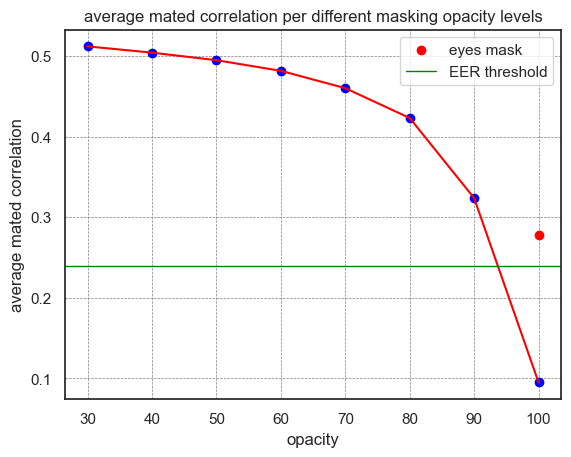

In [72]:
import matplotlib.pyplot as plt

# I tuoi dati
x = [30, 40, 50, 60, 70, 80, 90, 100, 100]
y = avg_corrs  # Assicurati che avg_corrs sia definito

# Dividi i dati in due parti: i primi 9 punti e l'ultimo punto
x_first_part = x[:8]
y_first_part = y[:8]
x_last_point = x[8]
y_last_point = y[8]

# Creare il grafico a dispersione per i primi 8 punti
plt.scatter(x_first_part, y_first_part, color='blue', marker='o')

# Tracciare la linea che interpola solo i primi 8 punti
plt.plot(x_first_part, y_first_part, color='red')

# Creare il grafico a dispersione per l'ultimo punto
plt.scatter(x_last_point, y_last_point, color='red', marker='o', label="eyes mask")

# Etichettare gli assi
plt.xlabel('opacity')
plt.ylabel('average mated correlation')

# Titolo del grafico
plt.title('average mated correlation per different masking opacity levels')

# Mostrare la griglia con personalizzazione
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')

# Aggiungere la riga y=0.23982732133720322
plt.axhline(y=0.23982732133720322, color='green', linestyle='-', linewidth=1, label='EER threshold')

# Mostrare la leggenda
plt.legend()

# Mostrare il grafico
plt.show()
